In [1]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, MaxPool2D, ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn import metrics

import numpy as np

In [2]:
X_train = np.load('Data/x_train.npy')
X_test = np.load('Data/x_test.npy')
y_train = np.load('Data/y_train.npy')
y_test = np.load('Data/y_test.npy')

print('shape X_train: ', np.shape(X_train))

shape X_train:  (60000, 28, 28)


In [3]:
# scaling data
X_train = X_train / 255
X_test = X_test / 255

In [4]:
# convert numbers to a single member array(for gray images, if rgb convert to 3 member array)
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [5]:
# One Hot Encoding y
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [6]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=X_train[0].shape),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(.2),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 30, 30, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                        

Epoch 1/20
200/200 [==============================] - 33s 160ms/step - loss: 0.3275 - accuracy: 0.9040 - val_loss: 0.0700 - val_accuracy: 0.9772
Epoch 2/20
200/200 [==============================] - 32s 162ms/step - loss: 0.0824 - accuracy: 0.9748 - val_loss: 0.0476 - val_accuracy: 0.9840
Epoch 3/20
200/200 [==============================] - 33s 164ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0354 - val_accuracy: 0.9872
Epoch 4/20
200/200 [==============================] - 33s 165ms/step - loss: 0.0441 - accuracy: 0.9861 - val_loss: 0.0306 - val_accuracy: 0.9901
Epoch 5/20
200/200 [==============================] - 33s 165ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0293 - val_accuracy: 0.9903
Epoch 6/20
200/200 [==============================] - 33s 163ms/step - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0271 - val_accuracy: 0.9903
Epoch 7/20
200/200 [==============================] - 33s 164ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0288 - val_ac

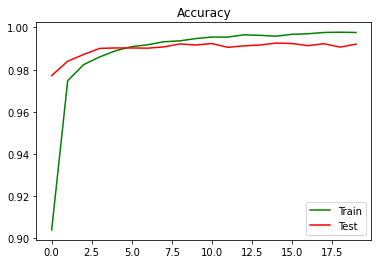

In [8]:
history = model.fit(X_train, y_train_ohe, epochs=20, validation_data=(X_test, y_test_ohe), batch_size=300)
model.save(f"model.h5")

y_pred_ohe = model.predict(X_test)
y_pred = list(map(np.argmax, y_pred_ohe))
print(metrics.classification_report(y_test, y_pred))

plt.plot(history.history['accuracy'], color='green', label='Train')
plt.plot(history.history['val_accuracy'], color='red', label='Test')
plt.title('Accuracy')
plt.legend()
plt.show()